In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pydantic import BaseModel
from typing import Optional

from sklearn.metrics import explained_variance_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [3]:
df = pd.read_csv("../figures/merged_validation.csv")
df.describe()

,Unnamed: 0,X,predicted_counts,prediction_prop,validation_counts,validation_prop
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,260.500000,5.500000,49.867308,0.100000,49.546231,0.098731
std,150.255338,2.875047,98.735237,0.193300,86.083829,0.164911
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,130.750000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,260.500000,5.500000,0.000000,0.000000,3.830000,0.010000
75%,390.250000,8.000000,44.250000,0.089533,70.147500,0.150000
max,520.000000,10.000000,605.000000,0.891626,640.300000,0.950000


In [4]:
df.head()

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site
0,1,1,Abiotic,0,0.000000,30.6,0.05,BisonGulch
1,2,2,Forb,36,0.058824,30.6,0.05,BisonGulch
2,3,3,Graminoid,220,0.359477,0.0,0.00,BisonGulch
3,4,4,Lichen,1,0.001634,30.6,0.05,BisonGulch
4,5,5,Moss,16,0.026144,30.6,0.05,BisonGulch


In [5]:
df["key"].unique()

array(['Abiotic', 'Forb', 'Graminoid', 'Lichen', 'Moss', 'ShrubDecid',
       'ShrubEvergreen', 'TreeBroadleaf', 'TreeConifer', 'Unknown'],
      dtype=object)

In [7]:
encoder = LabelEncoder()
df["site_code"] = encoder.fit_transform(df["site"])

In [8]:
df[["site","site_code"]].value_counts()

site         site_code
MurphyDome   3            120
Chatanika    1            110
EightMile    2            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40
dtype: int64

In [9]:
nodes = df["site_code"].unique()
print(nodes)
print(len(nodes))

colors = ['red', 'blue', 'yellow', 'violet', 'cyan', 'cyan']

cmap = ListedColormap(colors, name="sites")

[0 1 2 3 4 5]
6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


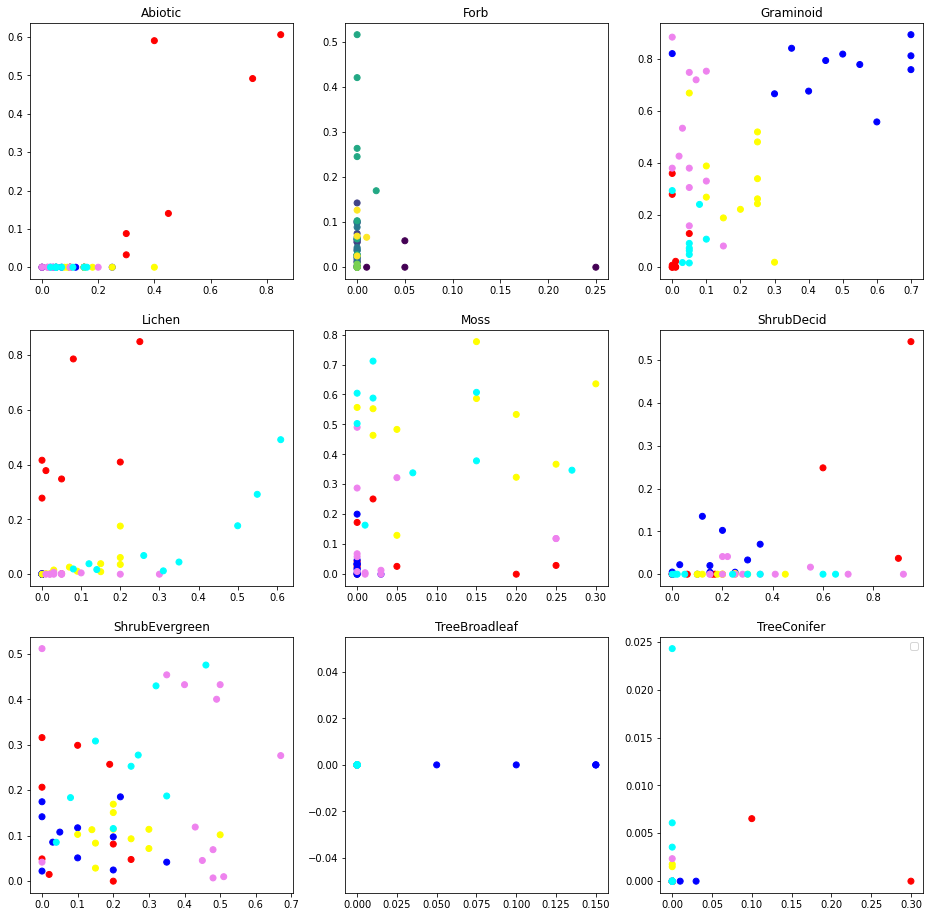

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))


ax[0][0].scatter(
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"],
    c=df[df["key"]=="Abiotic"]["site_code"],
    cmap=cmap)
ax[0][0].set_title("Abiotic")

ax[0][1].scatter(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"],
    c=df[df["key"]=="Forb"]["site_code"])
ax[0][1].set_title("Forb")

ax[0][2].scatter(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
    c=df[df["key"]=="Graminoid"]["site_code"],
    cmap = cmap)
ax[0][2].set_title("Graminoid")

ax[1][0].scatter(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"],
    c=df[df["key"]=="Lichen"]["site_code"],
    cmap = cmap)
ax[1][0].set_title("Lichen")

ax[1][1].scatter(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
    c=df[df["key"]=="Moss"]["site_code"],
    cmap = cmap)
ax[1][1].set_title("Moss")

ax[1][2].scatter(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"],
    c=df[df["key"]=="ShrubDecid"]["site_code"],
    cmap = cmap)
ax[1][2].set_title("ShrubDecid")

ax[2][0].scatter(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"],
    c=df[df["key"]=="ShrubEvergreen"]["site_code"],
    cmap = cmap)
ax[2][0].set_title("ShrubEvergreen")

ax[2][1].scatter(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"],
    c=df[df["key"]=="TreeBroadleaf"]["site_code"],
    cmap = cmap)
ax[2][1].set_title("TreeBroadleaf")

ax[2][2].scatter(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"],
    c=df[df["key"]=="TreeConifer"]["site_code"],
    cmap = cmap)
ax[2][2].set_title("TreeConifer")

plt.legend(
    
)

plt.show()


In [38]:
class ValidationResult(BaseModel):
    r2: float
    explained_variance: float
    intercept: float
    slope: float

    

In [51]:
def get_validation_stats(true: pd.Series, pred: pd.Series) -> ValidationResult:
    model = LinearRegression()
    model.fit(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    score = model.score(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    explained_variance = explained_variance_score(true.values.reshape(-1,1), pred.values.reshape(-1,1))
    return ValidationResult(
        r2 = score, 
        explained_variance = explained_variance, 
        intercept = model.intercept_,
        slope = model.coef_
    )

def pretty_print_results(result: ValidationResult, header: Optional[str] = None) -> None:
    indent = ""
    if(header is not None):
        print(header)
        indent = "\t"
    print(f"{indent}R-squared:\t\t{result.r2}")
    print(f"{indent}Explained Variance:\t{result.explained_variance}")
    print(f"{indent}Intercept:\t\t{result.intercept}")
    print(f"{indent}Slope:\t\t\t{result.slope}")


In [41]:
result = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

In [52]:
pretty_print_results(result, "Test")

Test
	R-squared:		0.6674914515220949
	Explained Variance:	0.6669519967537643
	Intercept:		0.10469216162209984
	Slope:			1.0292603770624422


In [54]:
abiotic = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

forb = get_validation_stats( 
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"])

graminoid = get_validation_stats(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
)

lichen = get_validation_stats(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"]
)

moss = get_validation_stats(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
)

shrub_decid = get_validation_stats(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"]
)

shrub_evergreen = get_validation_stats(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"]
)

tree_broadleaf = get_validation_stats(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"]
)

tree_conifer = get_validation_stats(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"]
)

In [55]:
pretty_print_results(abiotic, "Abiotic:")
pretty_print_results(forb, "Forb:")
pretty_print_results(graminoid, "Graminoid:")
pretty_print_results(lichen, "Lichen:")
pretty_print_results(moss, "Moss:")
pretty_print_results(shrub_decid, "Deciduous Shrubs:")
pretty_print_results(shrub_evergreen, "Evergreen Shrub")
pretty_print_results(tree_broadleaf, "Broadleaf Tree")
pretty_print_results(tree_conifer, "Coniferous Tree")

Abiotic:
	R-squared:		0.6674914515220949
	Explained Variance:	0.6669519967537643
	Intercept:		0.10469216162209984
	Slope:			1.0292603770624422
Forb:
	R-squared:		0.011269534742521126
	Explained Variance:	-8.400532426567592
	Intercept:		0.010065941874745788
	Slope:			-0.037992937408379314
Graminoid:
	R-squared:		0.32223850074492155
	Explained Variance:	-0.48579744930703916
	Intercept:		0.02079776398551375
	Slope:			0.38706712577452645
Moss:
	R-squared:		0.08447819420945768
	Explained Variance:	-5.293915942649082
	Intercept:		0.036753373454983695
	Slope:			0.11136971509192897
Deciduous Shrubs:
	R-squared:		0.19665365506860355
	Explained Variance:	0.18815466209071252
	Intercept:		0.22625573914292868
	Slope:			1.2624502543500549
Evergreen Shrub
	R-squared:		0.04090919145507088
	Explained Variance:	-0.32074585865243344
	Intercept:		0.18113356131002467
	Slope:			0.2516807928830782
Broadleaf Tree
	R-squared:		0.0
	Explained Variance:	0.0
	Intercept:		0.01153846153846154
	Slope:			0.0
Conifero

In [22]:
abiotic_evs = explained_variance_score( 
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

abiotic_model = LinearRegression(fit_intercept = True)
abiotic_model.fit(
    df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

print(abiotic_model.get_params())

abiotic_r2 = abiotic_model.score(df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

forb_r2 = explained_variance_score(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"]
)

print("Explained Variance by PFT")
print("Abiotic:")
print(f"\tExplained Variance:\t{abiotic_evs}")
print(f"\tR-Squared:\t\t{abiotic_r2}")
print(f"Forb: \t\t\t{forb_r2}")

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Explained Variance by PFT
Abiotic:
	Explained Variance:	0.6669519967537643
	R-Squared:		0.6674914515220949
Forb: 			-8.400532426567592
